In [268]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Let's import all the necessary libraries

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Let's load the csv file

In [270]:
df = pd.read_csv("IMDb Movies India(Task 2).csv", encoding= "cp1252")
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# As always let's explore the data

In [271]:
# Get the first five rows
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [272]:
# Get the last five rows
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [273]:
# Get the basic info about the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [274]:
# Get the name of all the columns
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [275]:
# Get the size
df.size

155090

In [276]:
# Get the shape
df.shape

(15509, 10)

In [277]:
# Let's get the basic stats of the numeric and non-numeric values from the file
df.describe(include = "all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981.000000,7240,13632,7919.000000,7919.000000,14984,13892,13125,12365
unique,13838,NaN,182,485,NaN,NaN,5938,4718,4891,4820
top,Anjaam,NaN,120 min,Drama,NaN,NaN,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,240,2780,NaN,NaN,58,158,83,91
mean,NaN,-1987.012215,NaN,NaN,5.841621,1938.520394,NaN,NaN,NaN,NaN
std,NaN,25.416689,NaN,NaN,1.381777,11602.415952,NaN,NaN,NaN,NaN
min,NaN,-2022.000000,NaN,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,-2009.000000,NaN,NaN,4.900000,16.000000,NaN,NaN,NaN,NaN
50%,NaN,-1991.000000,NaN,NaN,6.000000,55.000000,NaN,NaN,NaN,NaN
75%,NaN,-1968.000000,NaN,NaN,6.800000,404.000000,NaN,NaN,NaN,NaN


In [278]:
# Let's see how many duplicate values do we have in the file
df.duplicated().sum()

6

In [279]:
# Let's see how many Nan(null) values are there in the file
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7590
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [280]:
# Let's check the datatype of all columns
df.dtypes

Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

**We can see in the above datatypes that there are many numerical datatypes which are in the form of objects. Let's change them in order to analyze the data properly.**

In [294]:
# We are changing the datatype for column 'Duration'
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)

# Changing datatype with some string replacing
df["Votes"]=df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',',''))

AttributeError: Can only use .str accessor with string values!

**I have tried a lot of times to remove this above error but i'm not able to succeed in it**

In [295]:
# Let's fill the NaN(null) values of the Duration, Rating and Votes columns
df["Duration"].fillna(df["Duration"].mode().max(), inplace=True)

df["Rating"].fillna(df["Rating"].mean(),inplace=True)

df["Votes"].fillna(df["Votes"].mean(),inplace=True)

# Let's drop the Nan(null) values of the Year and Genre columns
df.dropna(subset="Year", inplace=True)
df.dropna(subset="Genre", inplace=True)

In [296]:
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director     481
Actor 1     1111
Actor 2     1539
Actor 3     2054
dtype: int64

**If you're wondering why i'm not filling or dropping the NaN(null) values of the last 3 columns then i want to let you know that if i'll do it still it's not gonna affect that much.**

In [297]:
# Let's see how many unique values do we have in each column
df.nunique()

Name        12032
Year           95
Duration      181
Genre         474
Rating         85
Votes        2034
Director     5339
Actor 1      4245
Actor 2      4424
Actor 3      4398
dtype: int64

I guess this much exploration is more than sufficient, so let's make the various diagrams and achieve our main task.

# Let's make the various diagrams in order to complete the task

## ** Top 10 Actors who appeared in most of the movies **

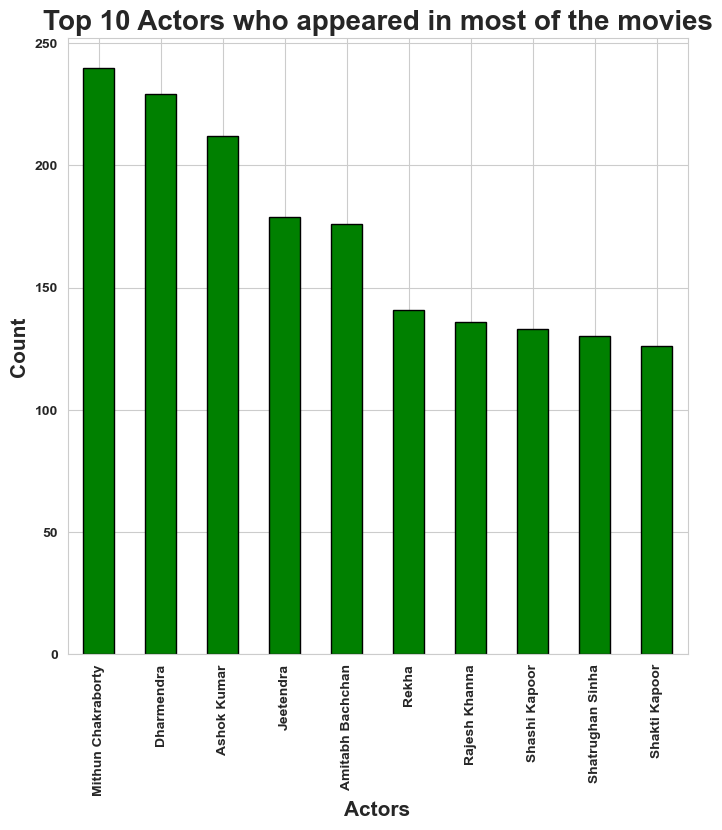

In [298]:
Actor1 = df["Actor 1"]
Actor2 = df["Actor 2"]
Actor3 = df["Actor 3"]

Actors = pd.concat([Actor1, Actor2, Actor3])

# Sorting the values in the descending order in order to get the expected result
Frequent_Actor = Actors.value_counts().sort_values(ascending=False).head(10)

Frequent_Actor.plot(kind="bar", color="green", figsize=(8,8), edgecolor = "k", linewidth=1)

plt.title("Top 10 Actors who appeared in most of the movies", fontweight="bold", fontsize=20)
plt.xlabel("Actors", fontweight="bold",fontsize=15)
plt.ylabel("Count", fontweight="bold",fontsize=15)
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.show()

## ** Top 10 Directors, Actor 1, Actor 2, Actor 3 **

In [299]:
def Top10best(column):
    df[column].value_counts().sort_values(ascending=False).head(10).plot(kind="bar", figsize=(8,8), color="#4285F4", edgecolor="k", linewidth=1)
    plt.title(f"Top 10 {column}", fontweight="bold", fontsize=20)
    plt.xlabel(f"{column}", fontweight="bold", fontsize=15)
    plt.ylabel("Count", fontweight="bold", fontsize=15)
    plt.xticks(fontweight="bold",rotation=45, fontsize=8)
    plt.yticks(fontweight="bold", fontsize=8)
    plt.show()

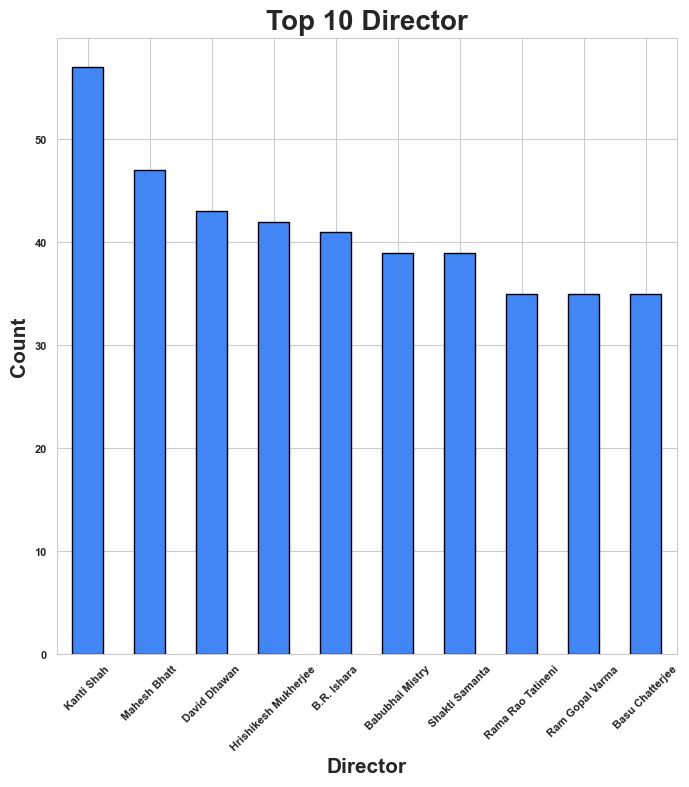

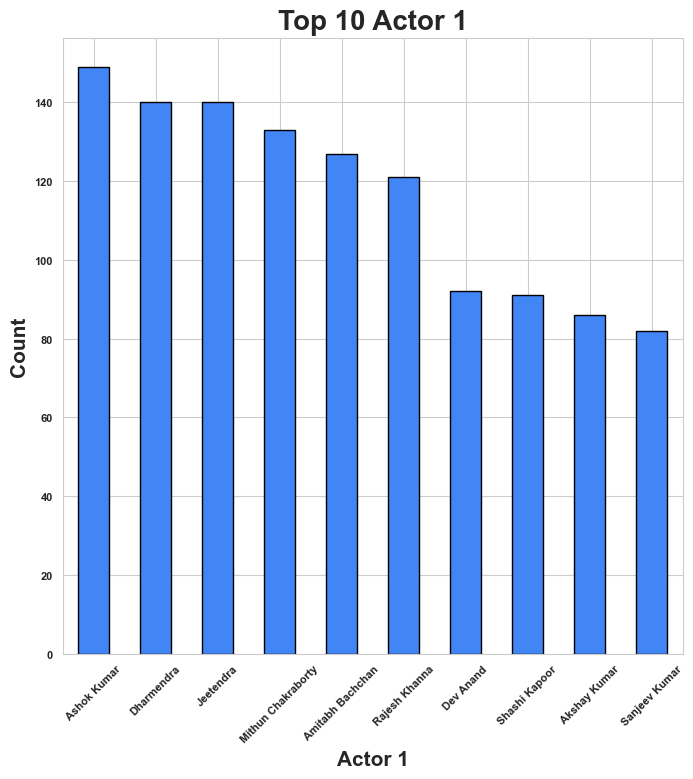

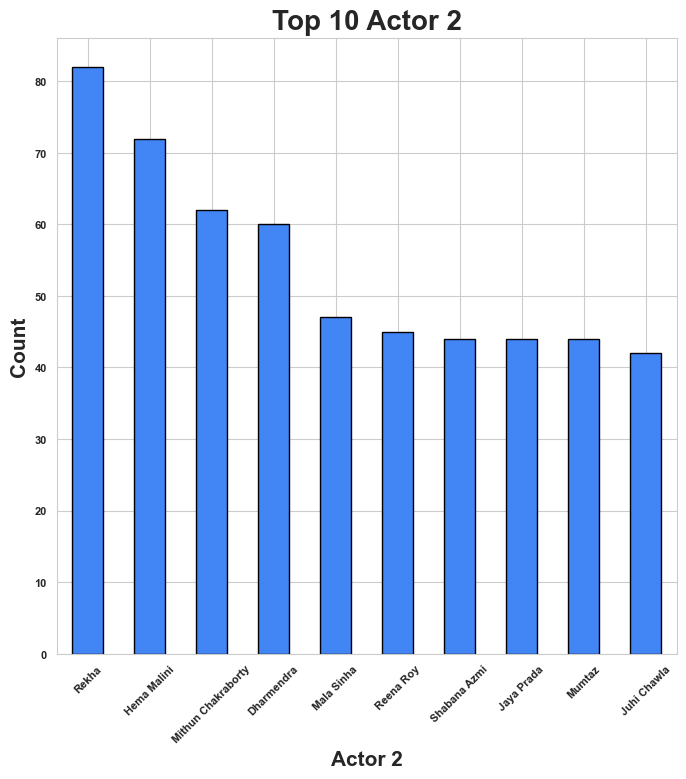

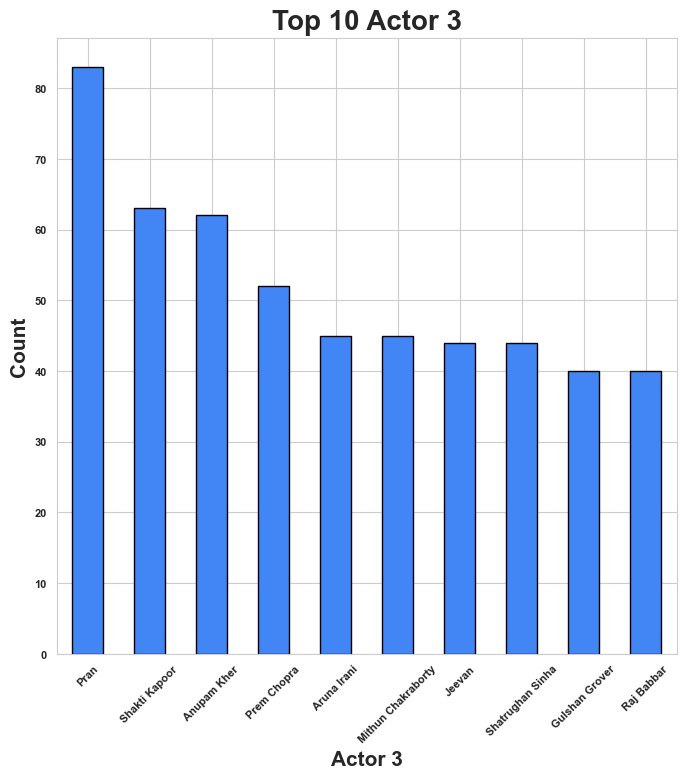

In [300]:
cols = ["Director", "Actor 1", "Actor 2", "Actor 3"]
for items in cols:
    Top10best(items)

## ** Top 10 best Genres for an indian movie **

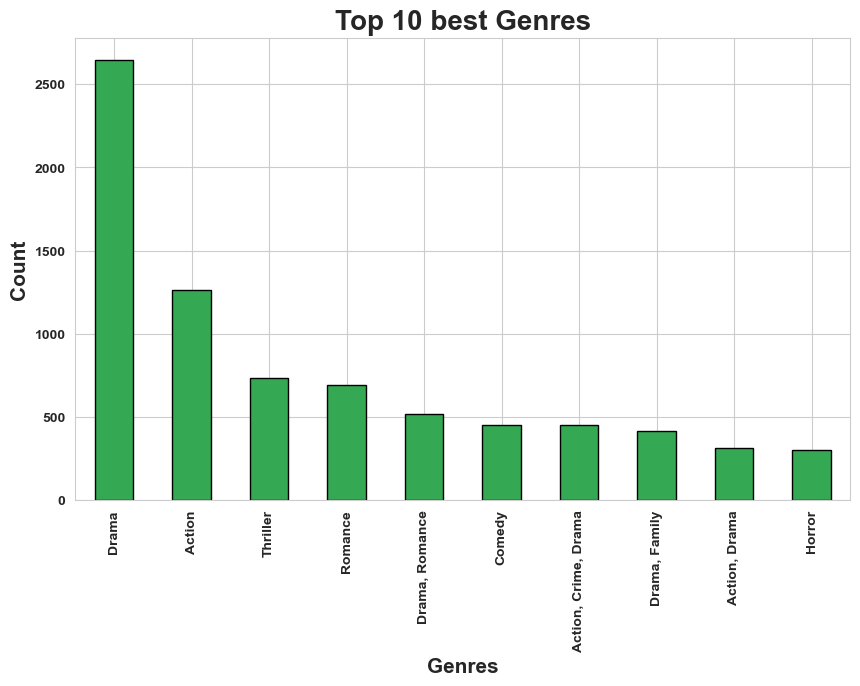

In [301]:
df["Genre"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar", figsize= (10,6), color="#34A853", edgecolor="k", linewidth=1)
plt.title("Top 10 best Genres", fontweight="bold", fontsize=20)
plt.xlabel("Genres", fontweight="bold", fontsize=15)
plt.ylabel("Count", fontweight="bold", fontsize=15)
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.show()

## ** Distribution of Released year, Duration, Rating, Votes **

In [302]:
def distribution(four_columns):
    plt.figure(figsize=(20,8))
    plt.hist(df[four_columns], edgecolor="#28282B", linewidth=2)
    plt.title(f"Distribution of {four_columns}",fontweight="bold", fontsize=20)
    plt.xlabel(four_columns, fontweight="bold", fontsize=18)
    plt.ylabel("Frequency", fontweight="bold", fontsize=18)
    plt.xticks(fontweight="bold", fontsize=15)
    plt.yticks(fontweight="bold", fontsize=15)
    plt.show()

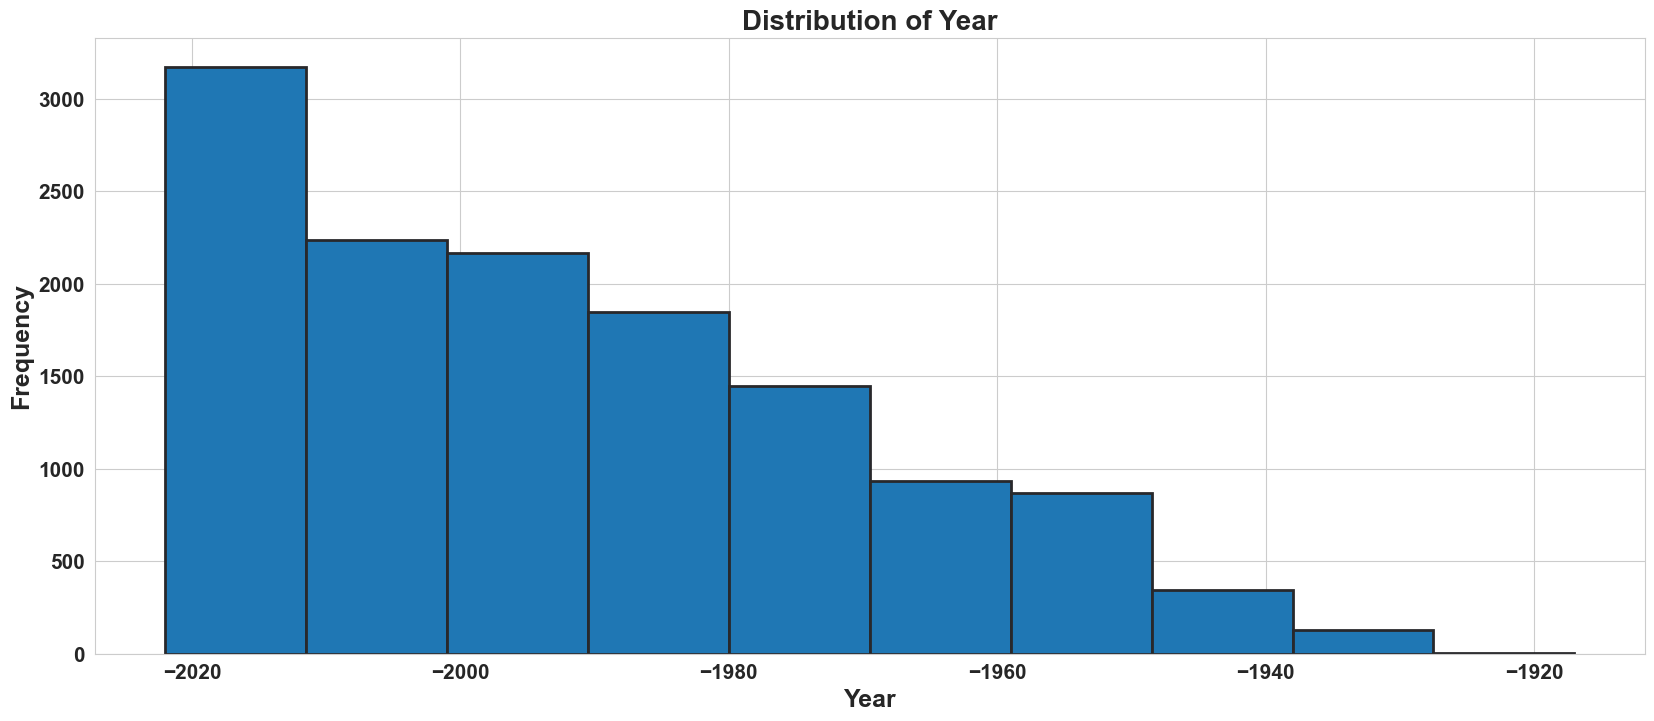

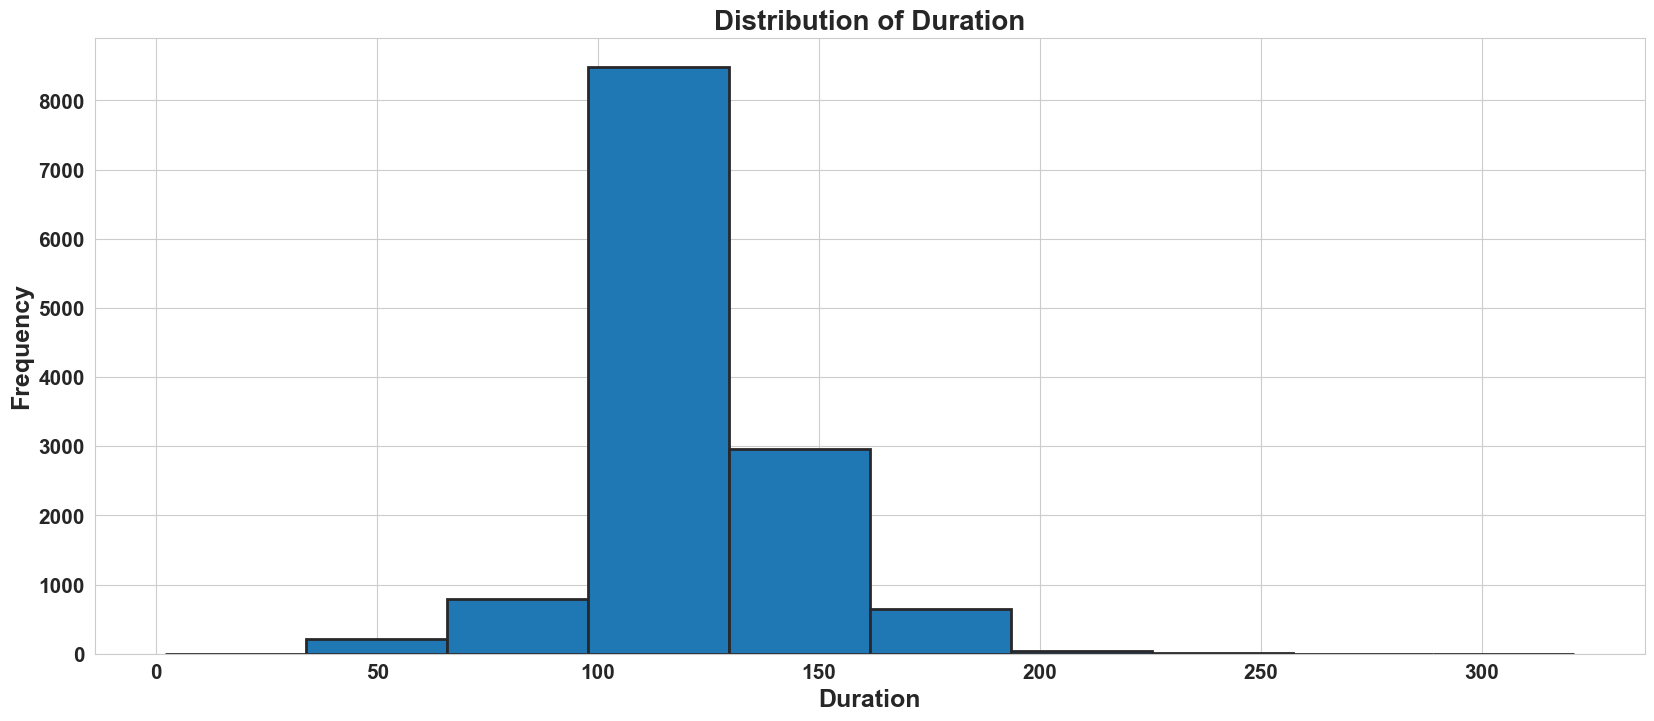

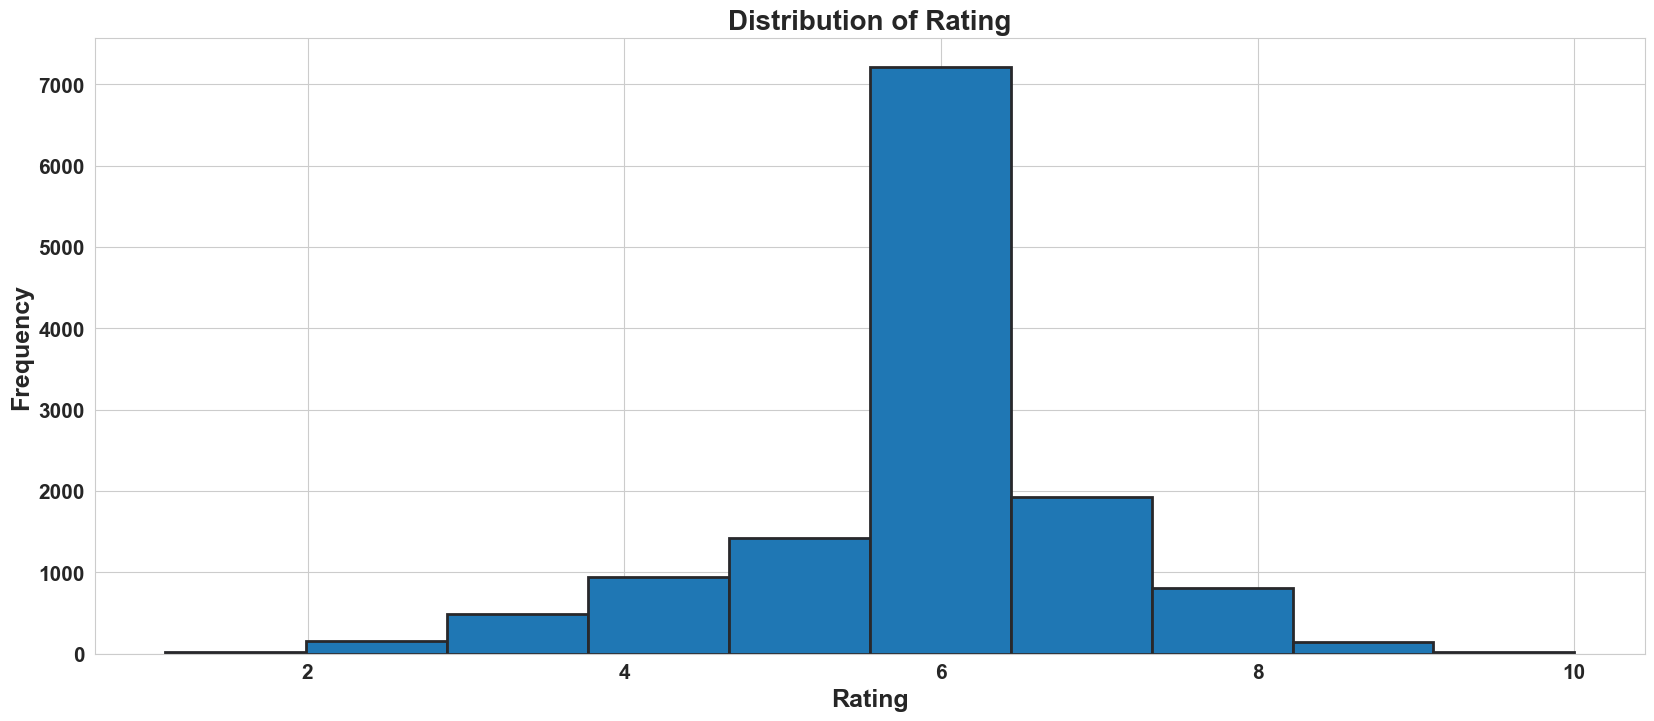

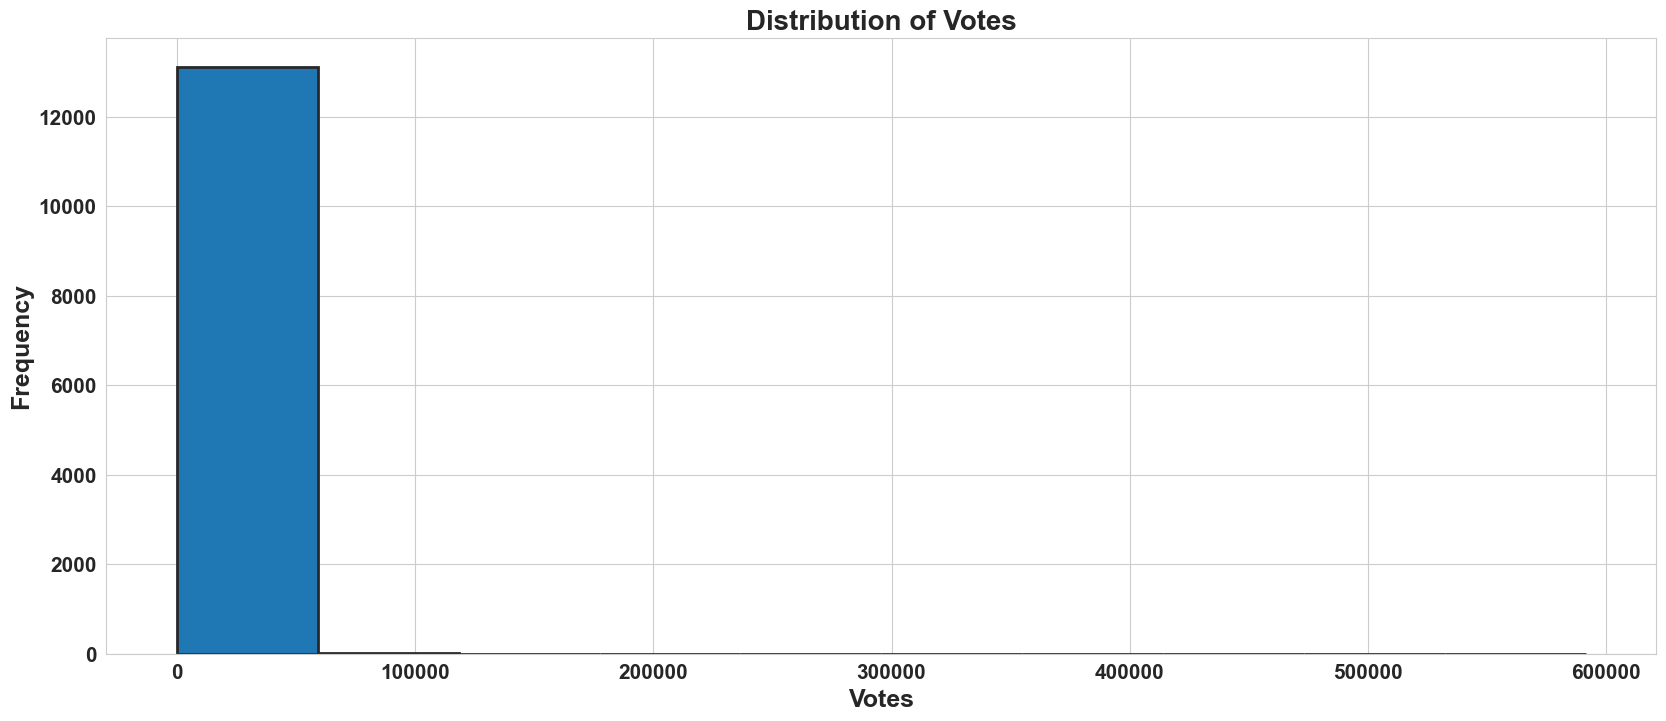

In [303]:
four_cols = ['Year', 'Duration', 'Rating', 'Votes']

i = 0

while i < len(four_cols):
    distribution(four_cols[i])
    i = i + 1

## ** Director who directed the most movies **

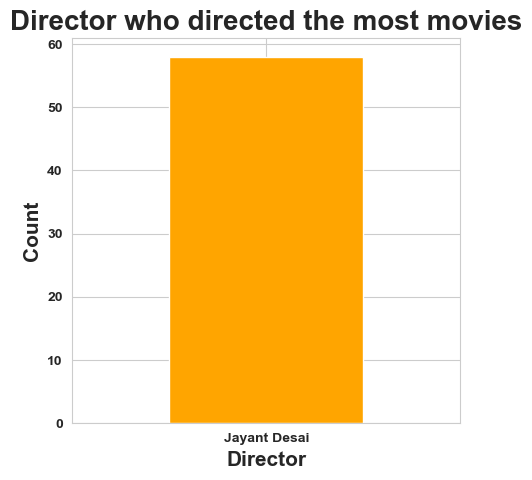

In [290]:
df["Director"].value_counts().sort_values(ascending=False).head(1).plot(kind="bar", figsize=(5,5), color="orange")
plt.title("Director who directed the most movies",fontweight="bold", fontsize=20)
plt.xlabel(f"Director", fontweight="bold", fontsize=15)
plt.ylabel("Count", fontweight="bold", fontsize=15)
plt.xticks(fontweight="bold",rotation=0)
plt.yticks(fontweight="bold")
plt.show()

# Thank you